# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#pip install citipy -- done from command line

In [2]:
# Dependencies and Setup
import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

today = date.today()

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
####ONLY FOR TESTING PURPOSES###
cities = cities[0:20]
print(cities)

['solec kujawski', 'sidi ali', 'valleyview', 'rikitea', 'hermanus', 'kamina', 'cape town', 'korla', 'kodiak', 'grand river south east', 'saint-philippe', 'castro', 'puerto ayora', 'punta arenas', 'fare', 'te anau', 'naze', 'vardo', 'new norfolk', 'ashqelon']


In [5]:


#step 1: Get URL using for loop to pull in

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
city_list = []
country = []
lat = []
long = []
maxTemp = []
humidity = []
cloud = []
wind = []
#error counter
errorCount = 0

for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_list.append(response['name'])
        country.append(response['sys']['country'])
        
    except:
        errorCount+=1
        
    #Wait a second in loop to not over exceed rate limit of API
    time.sleep(1.01)
print(f'{errorCount} cities not found')

1 cities not found


In [6]:
print(city_list)
print(country)
print(lat)
print(long)
print(maxTemp)
print(humidity)
print(cloud)
print(wind)

['Solec Kujawski', 'Sidi Ali', 'Valleyview', 'Rikitea', 'Hermanus', 'Kamina', 'Cape Town', 'Korla', 'Kodiak', 'Saint-Philippe', 'Castro', 'Puerto Ayora', 'Punta Arenas', 'Fare', 'Te Anau', 'Naze', 'Vardo', 'New Norfolk', 'Ashquelon']
['PL', 'DZ', 'CA', 'PF', 'ZA', 'CD', 'ZA', 'CN', 'US', 'RE', 'BR', 'EC', 'CL', 'PF', 'NZ', 'JP', 'NO', 'AU', 'IL']
[53.08, 36.1, 55.07, -23.12, -34.42, -8.74, -33.93, 41.76, 57.79, -21.36, -24.79, -0.74, -53.15, -16.7, -45.42, 28.37, 70.37, -42.78, 31.67]
[18.23, 0.42, -117.29, -134.97, 19.23, 24.99, 18.42, 86.15, -152.41, 55.77, -50.01, -90.35, -70.92, -151.02, 167.72, 129.48, 31.11, 147.06, 34.57]
[39.99, 51.8, 7.9, 78.96, 72, 63.91, 72, 26.01, 32, 78.8, 58.42, 78.64, 51.8, 81.99, 66.18, 69.8, 31.53, 66.99, 53.6]
[69, 51, 93, 80, 88, 95, 82, 81, 95, 94, 96, 82, 87, 79, 48, 77, 79, 72, 93]
[75, 0, 100, 100, 0, 100, 0, 69, 90, 58, 84, 68, 90, 16, 100, 75, 22, 75, 75]
[23.04, 5.32, 6.42, 20.56, 8.01, 3.09, 1.12, 2.55, 17.22, 17.22, 8.01, 4.47, 10.29, 14.45,

In [7]:
city_weatherInfo= {'City':city_list, 'Country':country, 'Latitude':lat, 'Longitude':long,
               'High Temp':maxTemp, 'Humidity':humidity, 'Cloudiness':cloud, 'Wind Speed':wind}

#city_weatherInfo

In [8]:
#step 3: Convert to DF

city_weatherDF = pd.DataFrame(city_weatherInfo)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_weatherDF.to_csv('output_data_file')

In [10]:
city_weatherDF.head(10)

,City,Country,Latitude,Longitude,High Temp,Humidity,Cloudiness,Wind Speed
0,Solec Kujawski,PL,53.08,18.23,39.99,69,75,23.04
1,Sidi Ali,DZ,36.10,0.42,51.80,51,0,5.32
2,Valleyview,CA,55.07,-117.29,7.90,93,100,6.42
3,Rikitea,PF,-23.12,-134.97,78.96,80,100,20.56
4,Hermanus,ZA,-34.42,19.23,72.00,88,0,8.01
5,Kamina,CD,-8.74,24.99,63.91,95,100,3.09
6,Cape Town,ZA,-33.93,18.42,72.00,82,0,1.12
7,Korla,CN,41.76,86.15,26.01,81,69,2.55
8,Kodiak,US,57.79,-152.41,32.00,95,90,17.22
9,Saint-Philippe,RE,-21.36,55.77,78.80,94,58,17.22


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

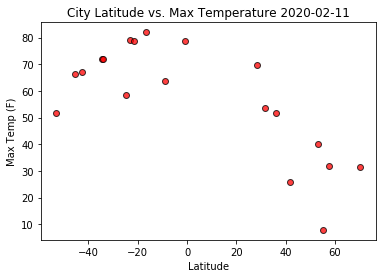

In [11]:
# The maximum x value for our chart will be 100
x_limit = 100
y_limit = 100



plt.scatter(lat, maxTemp, marker="o", facecolors="red", edgecolors="black", alpha=0.75)


plt.title("City Latitude vs. Max Temperature " + str(today))
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

#### Latitude vs. Humidity Plot

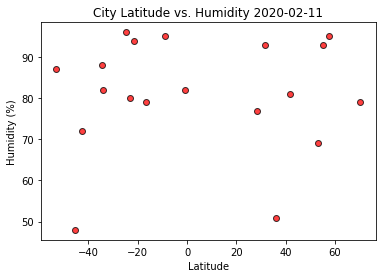

In [12]:
plt.scatter(lat, humidity, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Humidity " + str(today))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

#### Latitude vs. Cloudiness Plot

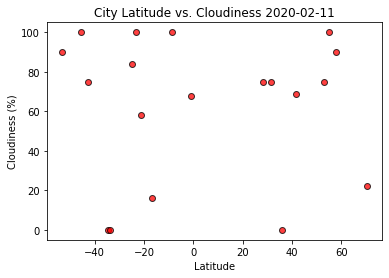

In [13]:
plt.scatter(lat, cloud, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Cloudiness " + str(today))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

#### Latitude vs. Wind Speed Plot

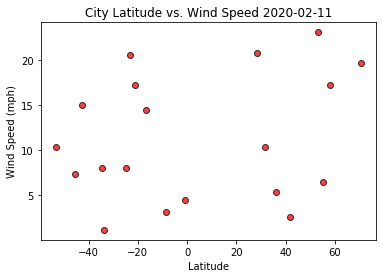

In [14]:
plt.scatter(lat, wind, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Wind Speed " + str(today))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

In [15]:
print(city_list)
print(country)
print(lat)
print(long)
print(maxTemp)
print(humidity)
print(cloud)
print(wind)

['Solec Kujawski', 'Sidi Ali', 'Valleyview', 'Rikitea', 'Hermanus', 'Kamina', 'Cape Town', 'Korla', 'Kodiak', 'Saint-Philippe', 'Castro', 'Puerto Ayora', 'Punta Arenas', 'Fare', 'Te Anau', 'Naze', 'Vardo', 'New Norfolk', 'Ashquelon']
['PL', 'DZ', 'CA', 'PF', 'ZA', 'CD', 'ZA', 'CN', 'US', 'RE', 'BR', 'EC', 'CL', 'PF', 'NZ', 'JP', 'NO', 'AU', 'IL']
[53.08, 36.1, 55.07, -23.12, -34.42, -8.74, -33.93, 41.76, 57.79, -21.36, -24.79, -0.74, -53.15, -16.7, -45.42, 28.37, 70.37, -42.78, 31.67]
[18.23, 0.42, -117.29, -134.97, 19.23, 24.99, 18.42, 86.15, -152.41, 55.77, -50.01, -90.35, -70.92, -151.02, 167.72, 129.48, 31.11, 147.06, 34.57]
[39.99, 51.8, 7.9, 78.96, 72, 63.91, 72, 26.01, 32, 78.8, 58.42, 78.64, 51.8, 81.99, 66.18, 69.8, 31.53, 66.99, 53.6]
[69, 51, 93, 80, 88, 95, 82, 81, 95, 94, 96, 82, 87, 79, 48, 77, 79, 72, 93]
[75, 0, 100, 100, 0, 100, 0, 69, 90, 58, 84, 68, 90, 16, 100, 75, 22, 75, 75]
[23.04, 5.32, 6.42, 20.56, 8.01, 3.09, 1.12, 2.55, 17.22, 17.22, 8.01, 4.47, 10.29, 14.45,

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots


In [17]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

-0.37510063623883544
58.327602628350206
-0.7281442822400522
0.0004082683775971456
0.08563772700900138
---------------------
y = -0.38x + 58.33


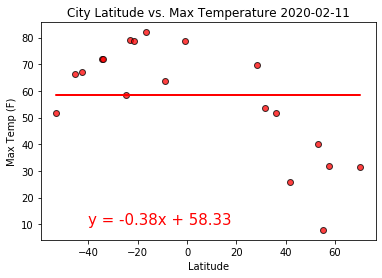

In [23]:
#### LIN REGREGSSION: MATPLOTLIB Class 3 -- 2:25:00 ###


city_list = np.array(city_list)
country = np.array(country)
lat = np.array(lat)
long = np.array(long)
maxTemp = np.array(maxTemp)
humidity = np.array(humidity)
cloud = np.array(cloud)
wind = np.array(wind)

# The maximum x value for our chart will be 100
x_limit = 100
y_limit = 100


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, maxTemp)
regress_values = lat * int(slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print("---------------------")
print(line_eq)

plt.scatter(lat, maxTemp, marker="o", facecolors="red", edgecolors="black", alpha=0.75)


plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")

plt.title("City Latitude vs. Max Temperature " + str(today))
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression